<a href="https://colab.research.google.com/github/Divyesh-2598/Image-Classification/blob/master/Cough_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!unzip -q "/content/Imagaes.zip"

In [5]:
!ls

 Asthama   drive   Imagaes   Imagaes.zip  'Normal Cough'   sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from PIL import Image

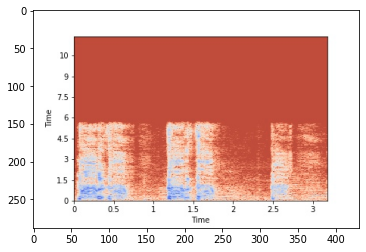

In [7]:
import cv2
DATADIR = "Imagaes"
CATEGORIES = ["As_Images", "NC_Images"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [8]:
print(img_array.shape)

(288, 432, 3)


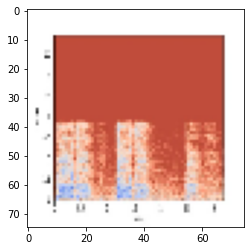

In [30]:
IMG_SIZE = 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [31]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 114/114 [00:00<00:00, 569.50it/s]

236


In [32]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
1
0
0
0


In [33]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [37]:
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(236, 75, 75, 3) float64
(236,) int64


In [39]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 165 samples, validate on 71 samples
Epoch 1/10
165/165 [==============================] - 3s 16ms/sample - loss: 4.1083 - acc: 0.4970 - val_loss: 0.8162 - val_acc: 0.4085
Epoch 2/10
165/165 [==============================] - 0s 870us/sample - loss: 0.7381 - acc: 0.4727 - val_loss: 0.6831 - val_acc: 0.6056
Epoch 3/10
165/165 [==============================] - 0s 843us/sample - loss: 0.6971 - acc: 0.4727 - val_loss: 0.6943 - val_acc: 0.4085
Epoch 4/10
165/165 [==============================] - 0s 878us/sample - loss: 0.6916 - acc: 0.5273 - val_loss: 0.7033 - val_acc: 0.4085
Epoch 5/10
165/165 [==============================] - 0s 858us/sample - loss: 0.6933 - acc: 0.4909 - val_loss: 0.6876 - val_acc: 0.6056
Epoch 6/10
165/165 [==============================] - 0s 868us/sample - loss: 0.6897 - acc: 0.5152 - val_loss: 0.6940 - val_acc: 0.5775
Epoch 7/10
165/165 [==============================] - 0s 863us/sample - loss: 0.7049 - acc: 0.4970 - val_loss: 0.6969 - val_acc: 0.4085
Epoc

In [41]:
def prepare(filepath):
    IMG_SIZE = 75
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/a.jpg119.jpg')])
print(CATEGORIES[int(predictions[0][0])])

As_Images


In [43]:
def prepare(filepath):
    IMG_SIZE = 75
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/n.jpg38.jpg')])
print(CATEGORIES[int(predictions[0][0])])

As_Images


In [0]:
from keras import layers
from keras import models
from keras.applications import InceptionResNetV2

In [0]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75,75,3))

In [46]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 37, 37, 32)   96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 37, 37, 32)   0           batch_normalization_204[0][0]    
________________________________________________________________________________

In [0]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [49]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)



Train on 188 samples, validate on 48 samples
Epoch 1/10
188/188 [==============================] - 59s 315ms/step - loss: 0.7095 - acc: 0.5532 - val_loss: 0.7330 - val_acc: 0.4792
Epoch 2/10
188/188 [==============================] - 2s 8ms/step - loss: 0.6114 - acc: 0.6436 - val_loss: 0.7090 - val_acc: 0.5625
Epoch 3/10
188/188 [==============================] - 1s 8ms/step - loss: 0.6206 - acc: 0.6915 - val_loss: 0.7303 - val_acc: 0.5000
Epoch 4/10
188/188 [==============================] - 1s 8ms/step - loss: 0.5735 - acc: 0.7500 - val_loss: 0.7285 - val_acc: 0.5000
Epoch 5/10
188/188 [==============================] - 2s 8ms/step - loss: 0.5080 - acc: 0.7979 - val_loss: 0.7079 - val_acc: 0.5417
Epoch 6/10
188/188 [==============================] - 2s 8ms/step - loss: 0.4610 - acc: 0.8457 - val_loss: 0.7008 - val_acc: 0.5208
Epoch 7/10
188/188 [==============================] - 2s 8ms/step - loss: 0.4578 - acc: 0.8351 - val_loss: 0.7132 - val_acc: 0.5208
Epoch 8/10
188/188 [======

In [52]:
def prepare(filepath):
    IMG_SIZE = 75
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/a.jpg25.jpg')])
print(CATEGORIES[int(predictions[0][0])])

NC_Images


In [51]:
def prepare(filepath):
    IMG_SIZE = 75
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/n.jpg38.jpg')])
print(CATEGORIES[int(predictions[0][0])])


NC_Images


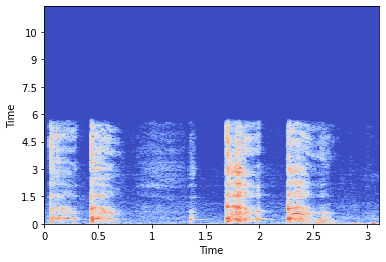

In [0]:
import librosa
from librosa import display
import os
import torch
import torch.nn as nn
import numpy as np
import pylab

save_path = 'bi3.jpg'

data,sr = librosa.load('/content/rec0_102.WAV',44100)

#pylab.axis('off') # no axis
#pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
stft = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(Xdb, sr=44100, x_axis='time', y_axis='time')
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)

In [0]:
!unzip -q "/content/Normal Cough.zip"

In [0]:
!ls

 drive	'Normal Cough'	'Normal Cough.zip'   sample_data


In [0]:
import librosa
from librosa import display
import os
import numpy as np
import pylab
import glob
data_dir = "Normal Cough"
audio_files = glob.glob(data_dir + '/*.WAV')
len(audio_files)

115

CPU times: user 18min 35s, sys: 5.12 s, total: 18min 40s
Wall time: 19min


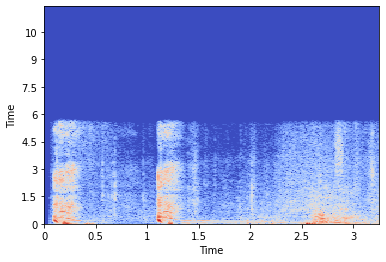

In [0]:
%%time
image_no = 1
name = "n.jpg"
for file in range(len(audio_files)):
  data,sr = librosa.load(audio_files[file],44100)
  #pylab.axis('off') # no axis
  #pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
  stft = librosa.stft(data)
  Xdb = librosa.amplitude_to_db(abs(stft))
  librosa.display.specshow(Xdb, sr=44100, x_axis='time', y_axis='time')
  save_path = name + str(image_no) + '.jpg'
  pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
  image_no += 1